In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Lab 1


*   **Purpose** = To assess data foundation skills using Python and Tableau
*   **Total Marks** = 12 (+1 for bonus question)
* **Print your output to PDF file for Learn submission (File -> Print)**
*   Data = Bike Rentals (see LEARN for CSV + data dictionary)


In [2]:
# Import necessary Python packages and libraries
import pandas as pd

In [3]:
# Import data
data = pd.read_csv(r'./bike_rentals_data.csv')

## Question 1 (3 Marks)
Using the methods learned in the tutorial, use the Pandas package to answer the following questions - show your work

*   How many rows exist?
*   How many features / columns are numeric?
*   What are the summary statistics (count, average, min, max) for each column?

In [4]:
print("Number of rows:", data.shape[0])

Number of rows: 10886


In [5]:
numeric_columns = data.select_dtypes(include='number')
print("Number of numeric columns:", numeric_columns.shape[1])

Number of numeric columns: 11


In [6]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## Question 2 (4 Marks)
Using the methods learned in the tutorial, map the enumerations (i.e. 1,2,3,4) of the following features to their descriptive names (i.e. Spring, Summer, Clear, Cloudy). Use the data dictionary to map numbers to names.

*   season
*   weather

Hint: There are multiple ways you can answer this question. Try the map() function otherwise use a user-defined function (UDF) to answer this question. Some students might also like to create smaller dataframes in Python or CSV and merge them using techniques from the tutorial.

https://www.geeksforgeeks.org/python-map-function/


In [7]:
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weather_mapping = {1: 'Clear', 2: 'Cloudy', 3: 'Rain', 4: 'Snow'}

data['season'] = data['season'].replace(season_mapping)
data['weather'] = data['weather'].replace(weather_mapping)

print(data.head())

          datetime  season  holiday  workingday weather  temp   atemp  \
0  2011-01-01 0:00  Spring        0           0   Clear  9.84  14.395   
1  2011-01-01 1:00  Spring        0           0   Clear  9.02  13.635   
2  2011-01-01 2:00  Spring        0           0   Clear  9.02  13.635   
3  2011-01-01 3:00  Spring        0           0   Clear  9.84  14.395   
4  2011-01-01 4:00  Spring        0           0   Clear  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


## Question 3 (2 Marks)
Using mayplotlib pyplot, create a bar plot to show number of bike rentals by each season.

Reminder: https://matplotlib.org/stable/tutorials/introductory/pyplot.html

*   Which season is the most popular for bike rental?


season
Fall      640662
Spring    312498
Summer    588282
Winter    544034
Name: count, dtype: int64
The most popular season for bike rental is Season 3 (Fall).


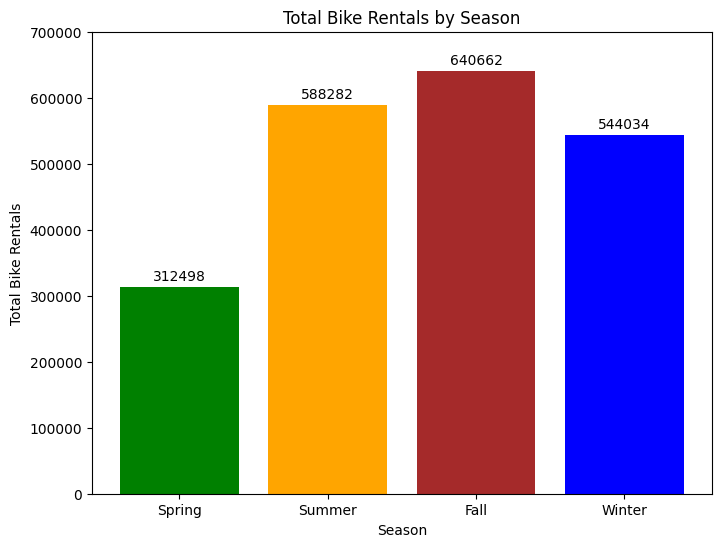

In [ ]:
import matplotlib.pyplot as plt

seasonal_data = data.groupby('season')['count'].sum()

print(seasonal_data)

print("The most popular season for bike rental is Season 3 (Fall).")

def getInt(object: any, attr: str):
    return int(object[attr])

def getSeasonalData(attr: str):
    return getInt(seasonal_data, attr)
    
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
values = [getSeasonalData(season) for season in seasons]
colors = ['green', 'orange', 'brown', 'blue']

plt.figure(figsize=(8, 6))
plt.bar(seasons, values, color=colors)

plt.xlabel('Season')
plt.ylabel('Total Bike Rentals')
plt.title('Total Bike Rentals by Season')

plt.ylim(0, 700000)

for season, value in zip(seasons, values):
    plt.text(season, value+10000, str(value), ha='center')

plt.show()

##Question 4 (3 Marks)
Research methods for parsing date/time or use user-defined functions (UDFs) to feature engineer the following features:

*   hour (i.e. 8, 13, 22)
*   time_of_day (i.e. morning == 5 to 11, afternoon == 12 to 17, evening == 18 to 4)
*   is_weekend (i.e. IF Saturday or Sunday THEN 1 ELSE 0)
*   month (i.e. January, February, March)

Suggested Reading:
*   https://docs.python.org/3/library/datetime.html
*   https://www.kaggle.com/code/nextbigwhat/feature-engineering-of-datetime-variables
*   https://www.analyticsvidhya.com/blog/2019/12/6-powerful-feature-engineering-techniques-time-series/




In [9]:
from datetime import datetime

def get_hour(dt):
    return dt.hour

def get_time_of_day(dt):
    hour = dt.hour
    if 5 <= hour < 12:
        return "morning"
    elif 12 <= hour < 18:
        return "afternoon"
    else:
        return "evening"

def is_weekend(dt):
    return 1 if dt.weekday() >= 5 else 0

def get_month_name(dt):
    return dt.strftime("%B")

test_date = datetime(2025, 5, 25, 14, 30)

print("Hour:", get_hour(test_date))
print("Time of day:", get_time_of_day(test_date))
print("Is weekend:", is_weekend(test_date))
print("Month name:", get_month_name(test_date))

Hour: 14
Time of day: afternoon
Is weekend: 1
Month name: May


##Bonus Question (1 Mark)
Using Tableau, create a box-and-whisker chart to show the distribution of bike rentals across the following categories (one chart and 1 tab for each category requested):

*   By Seasons
*   By Weather
*   By Is Working Day

https://help.tableau.com/current/pro/desktop/en-us/buildexamples_boxplot.htm

**Note: Save the Tableau file as a packaged workbook (.twbx) so TAs can open it with data embedded. Failure to do so will result in 0 for this question.**



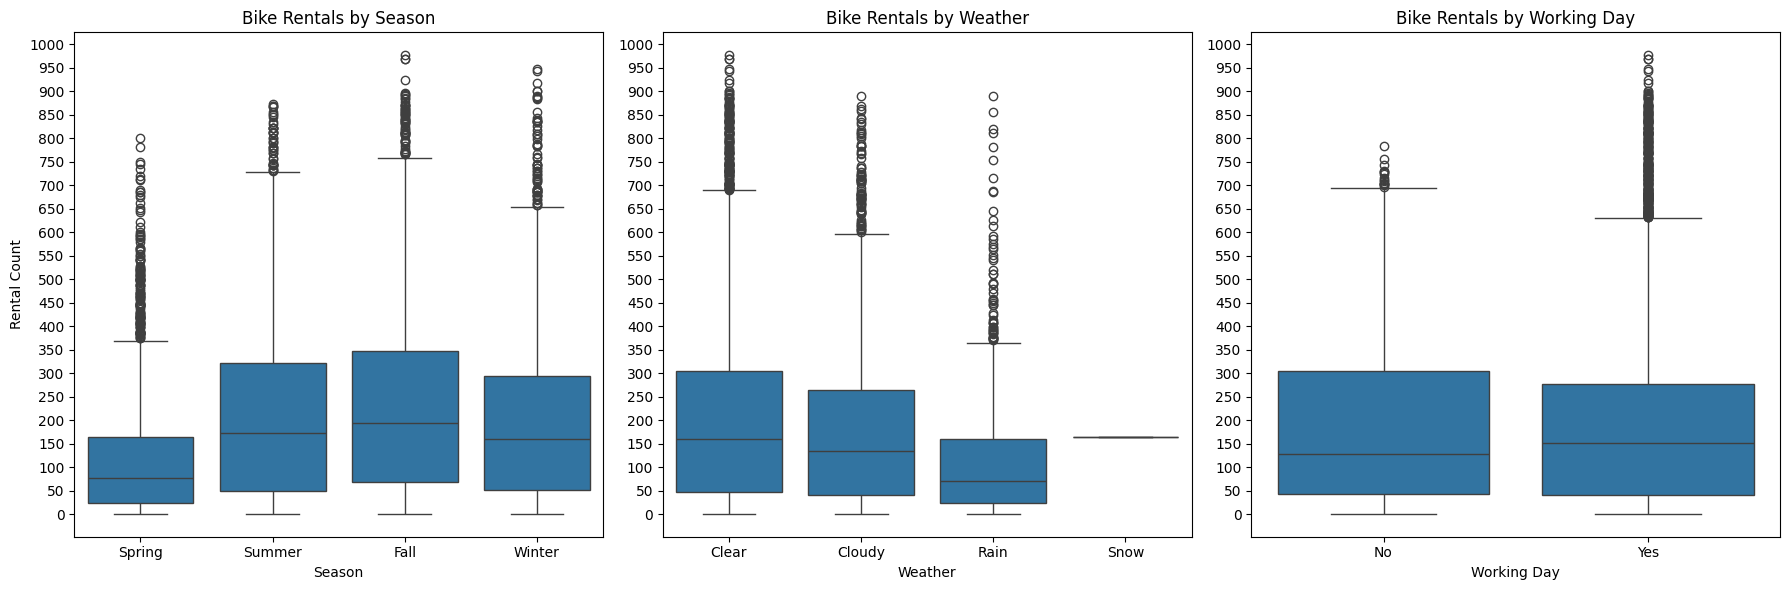

In [13]:
workingday_mapping = {0: "No", 1: "Yes"}

data['workingday'] = data['workingday'].replace(workingday_mapping)

import seaborn as sns
from matplotlib.ticker import MultipleLocator

# 创建3个子图的图形
plt.figure(figsize=(18, 6))

# 1. 按季节的箱线图
ax1 = plt.subplot(1, 3, 1)
sns.boxplot(x='season', y='count', data=data, order=['Spring','Summer','Fall','Winter'])
ax1.yaxis.set_major_locator(MultipleLocator(50))
plt.title('Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Rental Count')

# 2. 按天气的箱线图
ax2 = plt.subplot(1, 3, 2)
sns.boxplot(x='weather', y='count', data=data)
ax2.yaxis.set_major_locator(MultipleLocator(50))
plt.title('Bike Rentals by Weather')
plt.xlabel('Weather')
plt.ylabel('')

# 3. 按工作日的箱线图
ax3 = plt.subplot(1, 3, 3)
sns.boxplot(x='workingday', y='count', data=data)
ax3.yaxis.set_major_locator(MultipleLocator(50))
plt.title('Bike Rentals by Working Day')
plt.xlabel('Working Day')
plt.ylabel('')

plt.tight_layout()
plt.show()